In [2]:
import matplotlib.pyplot as plt
import json
import glob
import re
import pandas as pd
import numpy as np

import qutip
from CoupledQuantumSystems.drive import *
from scipy.optimize import minimize
from CoupledQuantumSystems.IFQ import gfIFQ
from CoupledQuantumSystems.evo import ODEsolve_and_post_process


In [34]:
EJ = 3
EJoverEC = 6
EJoverEL = 25
EC = EJ / EJoverEC
EL = EJ / EJoverEL
n_lvls = 110
qbt = gfIFQ(EJ = EJ,EC = EC, EL = EL, flux = 0,truncated_dim=n_lvls)

max_amp = 10
n_amps = 100
amp_array = np.linspace(0, max_amp, n_amps)
# Create empty array to store eigenvalues   
eigenvalues = np.zeros((n_amps, n_lvls))

# Loop through each amplitude
for i, amp in enumerate(amp_array):
    # H = qbt.diag_hamiltonian + 2*np.pi*amp*qbt.fluxonium.n_operator(energy_esys=True)
    H = qbt.fluxonium.hamiltonian() + 2*np.pi*amp*qbt.fluxonium.n_operator()
    evals, evecs = np.linalg.eigh(H)
    eigenvalues[i, :] = evals

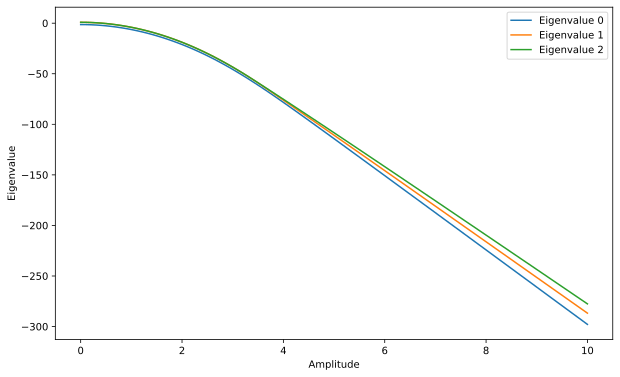

In [43]:
# Plot each eigenvalue as a function of amplitude
plt.figure(figsize=(10, 6))
for i in range(3):
    plt.plot(amp_array, eigenvalues[:, i], label=f'Eigenvalue {i}')
plt.xlabel('Amplitude')
plt.ylabel('Eigenvalue')
# plt.yscale('log')
# plt.ylim(1e-6,1e1)
plt.legend()

Spectral data:   0%|          | 0/100 [00:00<?, ?it/s]

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='$\\Phi_{ext}/\\Phi_0$', ylabel='energy [GHz]'>)

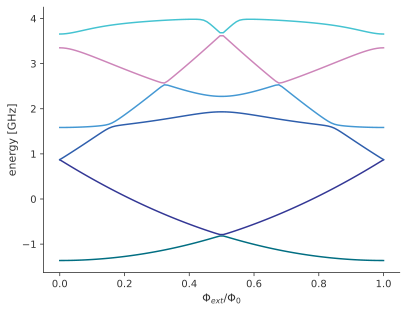

In [13]:
qbt.fluxonium.plot_evals_vs_paramvals(
    param_name="flux",
    param_vals=np.linspace(0, 1, 100),
)
